# Country Aid Assessment Dataset

### Table of Contents:

0. Problem Statement
1. Data Analysis
    - Importing Libraries and Data
    - Data Description
    - Data Cleanup
    - Exploratory Data Analysis (EDA)
        - General Overview of Data
        - Distribution Plots
        - Box Plots
        - Correlation Heatmap
        - Pairplots
        - Statistical Test??????????????????
2. Machine Learning
    - PCA
    - Model Selection
    - Model Evaluation
        - Hyperparameter Tuning
        - Test Set Evaluation
3. Conclusions
    - Feature Importance
    - Final words

# 0.  Problem Statement

**Problem:** After the completion of recent funding programs, International Humanitarian NGO has raised around $10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision have mostly related to the countries in dire need of Aid.

**Objective:** Classify countries in the dataset using the socio-economic and health markers that determine the overall development of a nation. Determine countries that deserve the most attention and which are to be prioritized in the Financial Aid Program.

**Solution:** Using Principal Component Analysis, build a Machine Learning Clustering Model that will successfully rank countries according to their suitability for receiving Financial Aid.

# 1. Data Analysis

## Importing Libraries and Data

In [135]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import dbscan

In [2]:
dict = pd.read_csv("data-dictionary.csv")
data = pd.read_csv("Country-data.csv")

## Data Description

The columns of the Dataset are thoroughly described in the seperate `data-dictionary.csv` file and provided to us by the company.

In [3]:
dict.set_index("Column Name", inplace=True)
dict

,Description
Column Name,
country,Name of the country
child_mort,Death of children under 5 years of age per 1000 live births
exports,Exports of goods and services. Given as %age of the Total GDP
health,Total health spending as %age of Total GDP
imports,Imports of goods and services. Given as %age of the Total GDP
Income,Net income per person
Inflation,The measurement of the annual growth rate of the Total GDP
life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.


In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Cleanup

In [14]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#Checking for null values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
#Checking for duplicates
data.duplicated().sum()

0

## Exploratory Data Analysis

Before building the Clustering Model, this dataset deserves a thorough analysis.

In [8]:
#Descriptive statistics for dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Top and Bottom 3 Countries by Child Mortality

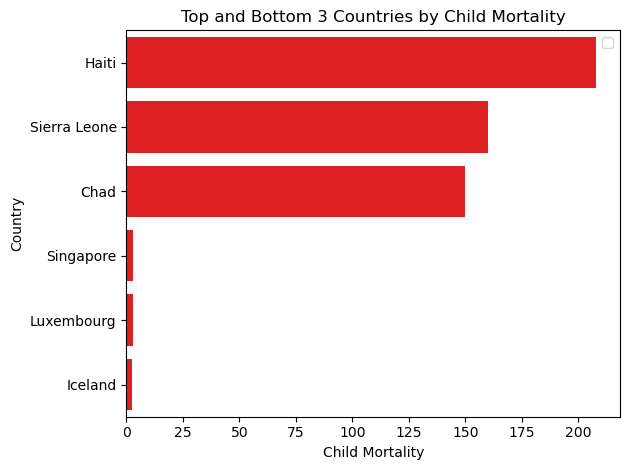

In [9]:
data_tmp = data.sort_values(by='child_mort', ascending=False)
data_mort = data_tmp.iloc[[0,1,2, -3, -2, -1],:]
sns.barplot(data=data_mort, y='country', x='child_mort', color='r')
plt.xlabel('Child Mortality')
plt.ylabel('Country')
plt.title("Top and Bottom 3 Countries by Child Mortality")
#plt.gca()d.invert_yaxis()
plt.legend('')
plt.tight_layout()
plt.savefig("images/01_ChildMortality.png", bbox_inches='tight')
plt.show()

### Top and Bottom 3 Countries by Exports

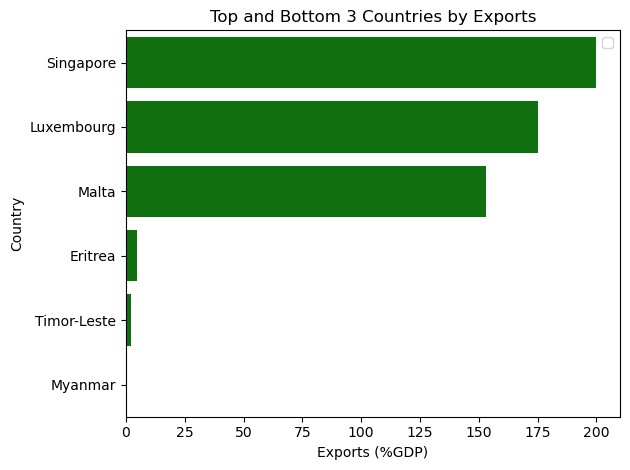

In [11]:
data_tmp = data.sort_values(by='exports', ascending=False)
data_mort = data_tmp.iloc[[0,1,2, -3, -2, -1],:]
sns.barplot(data=data_mort, y='country', x='exports', color='g')
plt.xlabel('Exports (%GDP)')
plt.ylabel('Country')
plt.title("Top and Bottom 3 Countries by Exports")
#plt.gca().invert_yaxis()
plt.legend('')
plt.tight_layout()
plt.savefig("images/01_Exports.png", bbox_inches='tight')
plt.show()

### Top and Bottom 3 Countries by Imports

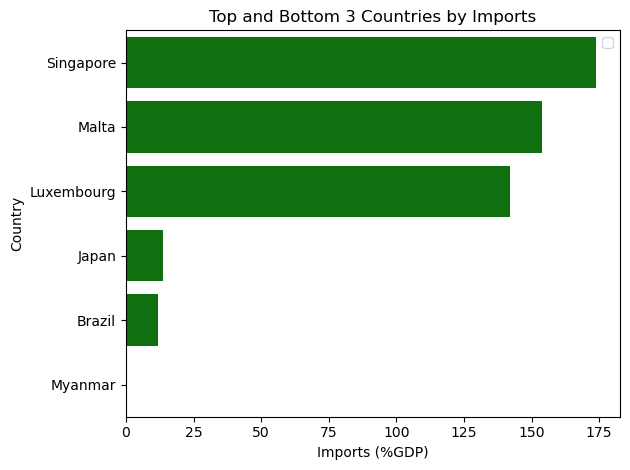

In [12]:
data_tmp = data.sort_values(by='imports', ascending=False)
data_mort = data_tmp.iloc[[0,1,2, -3, -2, -1],:]
sns.barplot(data=data_mort, y='country', x='imports', color='g')
plt.xlabel('Imports (%GDP)')
plt.ylabel('Country')
plt.title("Top and Bottom 3 Countries by Imports")
#plt.gca().invert_yaxis()
plt.legend('')
plt.tight_layout()
plt.savefig("images/01_Imports.png", bbox_inches='tight')
plt.show()

### Top and Bottom 3 Countries by Income

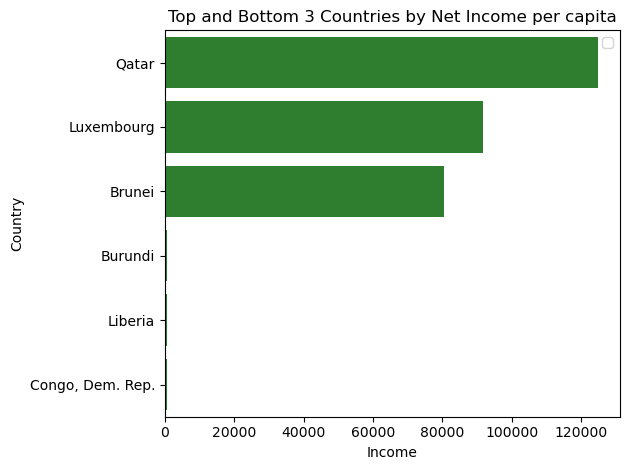

In [13]:
data_tmp = data.sort_values(by='income', ascending=False)
data_mort = data_tmp.iloc[[0,1,2, -3, -2, -1],:]
sns.barplot(data=data_mort, y='country', x='income', color='forestgreen')
plt.xlabel('Income')
plt.ylabel('Country')
plt.title("Top and Bottom 3 Countries by Net Income per capita")
#plt.gca().invert_yaxis()
plt.legend('')
plt.tight_layout()
plt.savefig("images/01_IncomePC.png", bbox_inches='tight')
plt.show()

### Top and Bottom 3 Countries by Inflation

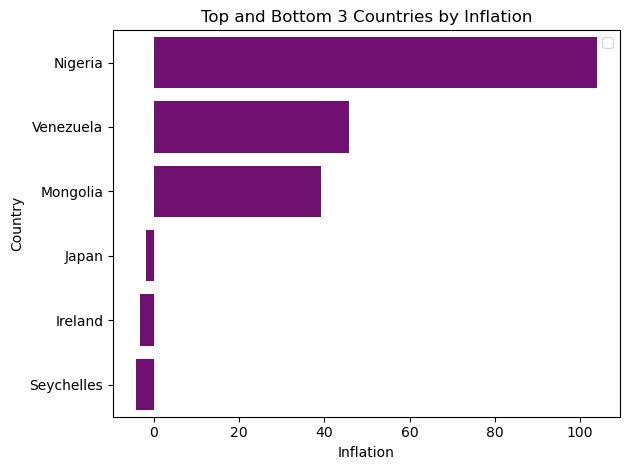

In [16]:
data_tmp = data.sort_values(by='inflation', ascending=False)
data_mort = data_tmp.iloc[[0,1,2, -3, -2, -1],:]
sns.barplot(data=data_mort, y='country', x='inflation', color='purple')
plt.xlabel('Inflation')
plt.ylabel('Country')
plt.title("Top and Bottom 3 Countries by Inflation")
#plt.gca().invert_yaxis()
plt.legend('')
plt.tight_layout()
plt.savefig("images/01_Inflation.png", bbox_inches='tight')
plt.show()

### Top and Bottom 3 Countries by Life Expectancy

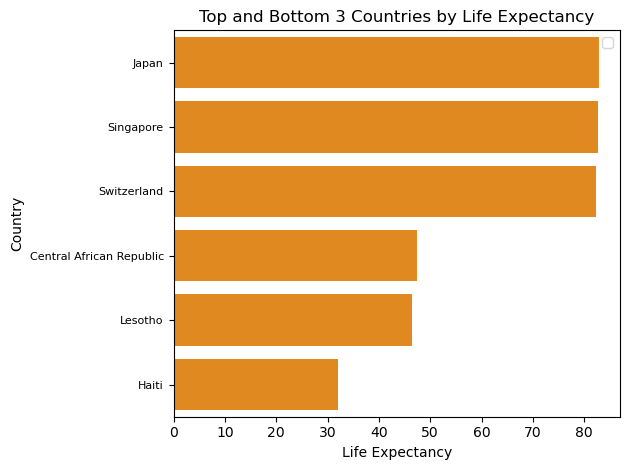

In [24]:
data_tmp = data.sort_values(by='life_expec', ascending=False)
data_mort = data_tmp.iloc[[0,1,2, -3, -2, -1],:]
sns.barplot(data=data_mort, y='country', x='life_expec', color='darkorange')
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.yticks(fontsize=8)
plt.title("Top and Bottom 3 Countries by Life Expectancy")
#plt.gca().invert_yaxis()
plt.legend('')
plt.tight_layout()
plt.savefig("images/01_LifeExpectancy.png", bbox_inches='tight')
plt.show()

### Top and Bottom 3 Countries by Total Fertility

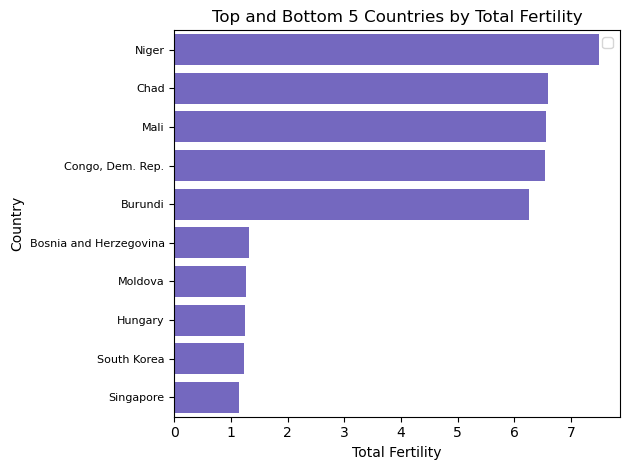

In [29]:
data_tmp = data.sort_values(by='total_fer', ascending=False)
data_mort = data_tmp.iloc[[0,1,2,3,4,-5,-4, -3, -2, -1],:]
sns.barplot(data=data_mort, y='country', x='total_fer', color='slateblue')
plt.xlabel('Total Fertility')
plt.ylabel('Country')
plt.yticks(fontsize=8)
plt.title("Top and Bottom 5 Countries by Total Fertility")
#plt.gca().invert_yaxis()
plt.legend('')
plt.tight_layout()
plt.savefig("images/01_TotalFertility.png", bbox_inches='tight')
plt.show()

### Top and Bottom 5 Countries by GDP per capita

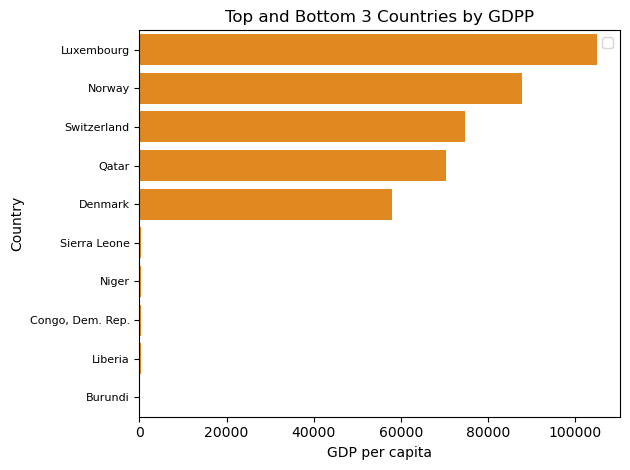

In [27]:
data_tmp = data.sort_values(by='gdpp', ascending=False)
data_mort = data_tmp.iloc[[0,1,2,3,4,-5,-4, -3, -2, -1],:]
sns.barplot(data=data_mort, y='country', x='gdpp', color='darkorange')
plt.xlabel('GDP per capita')
plt.ylabel('Country')
plt.yticks(fontsize=8)
plt.title("Top and Bottom 3 Countries by GDPP")
#plt.gca().invert_yaxis()
plt.legend('')
plt.tight_layout()
plt.savefig("images/01_GDPP.png", bbox_inches='tight')
plt.show()

### Digression: Data for Croatia and the US

In [73]:
data_Croatia_US = data[(data['country']=='Croatia') | (data['country']=='United States')]

In [74]:
data_Croatia_US

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


## Distribution plots

In [83]:
numerical_cols = data.drop('country', axis='columns').columns
numerical_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

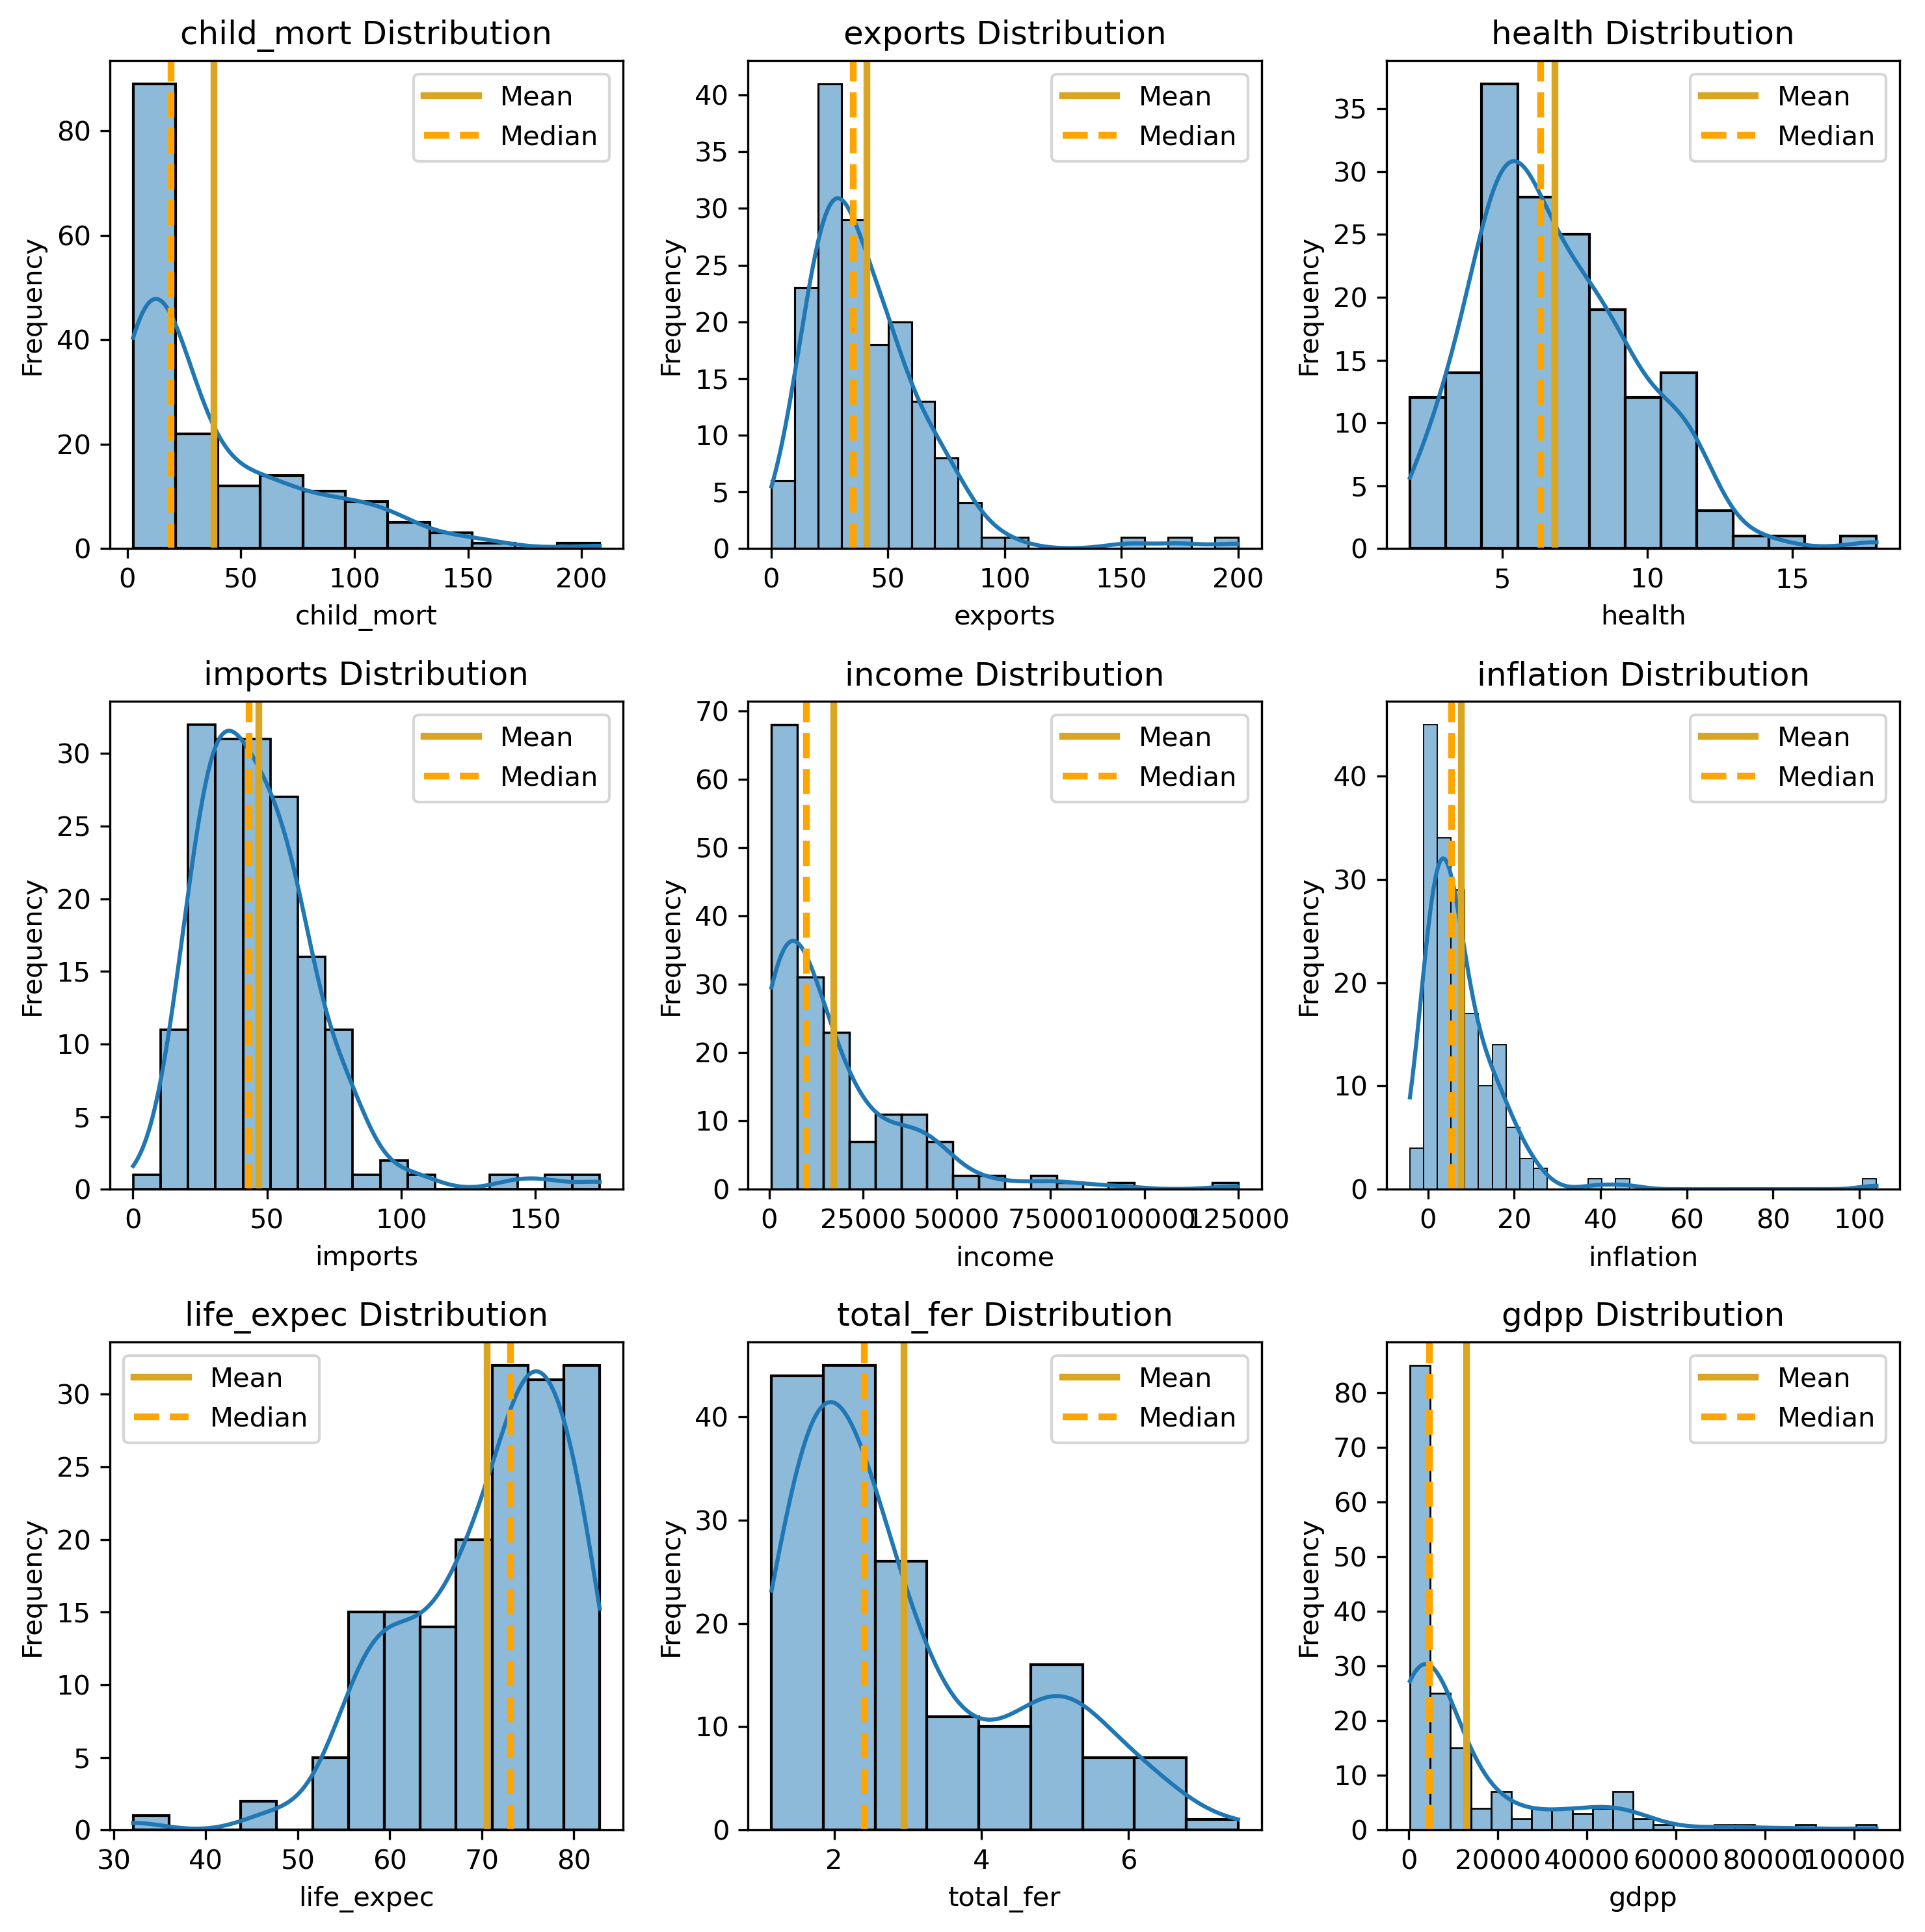

In [104]:
#Distribution plots for numerical features
fig= plt.figure(figsize=(10,10), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.histplot(data[col], kde=True)
    plt.axvline(x=data[col].mean(), c='goldenrod', ls='-', lw=2.5)
    plt.axvline(x=data[col].median(), c='orange', ls='--', lw=2.5)
    plt.ylabel("Frequency")
    mean_label = mlines.Line2D([], [], c='goldenrod', ls='-', lw=2.5, label='Mean')
    median_label = mlines.Line2D([], [], c='orange', ls='--', lw=2.5, label='Median')

    plt.legend(handles=[mean_label, median_label])
    plt.title(f'{col} Distribution')

plt.savefig('images/02_Distributions.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

We immediately see that the distributions of most of the features are positively or negatively skewed and tend to be of the log-normal type. This is something we would want to rectify in a Supervised ML model. But, for the purposes of clustering and segmenting countries by their features, it is actually very important not to modify these original distributions.

## Boxplots

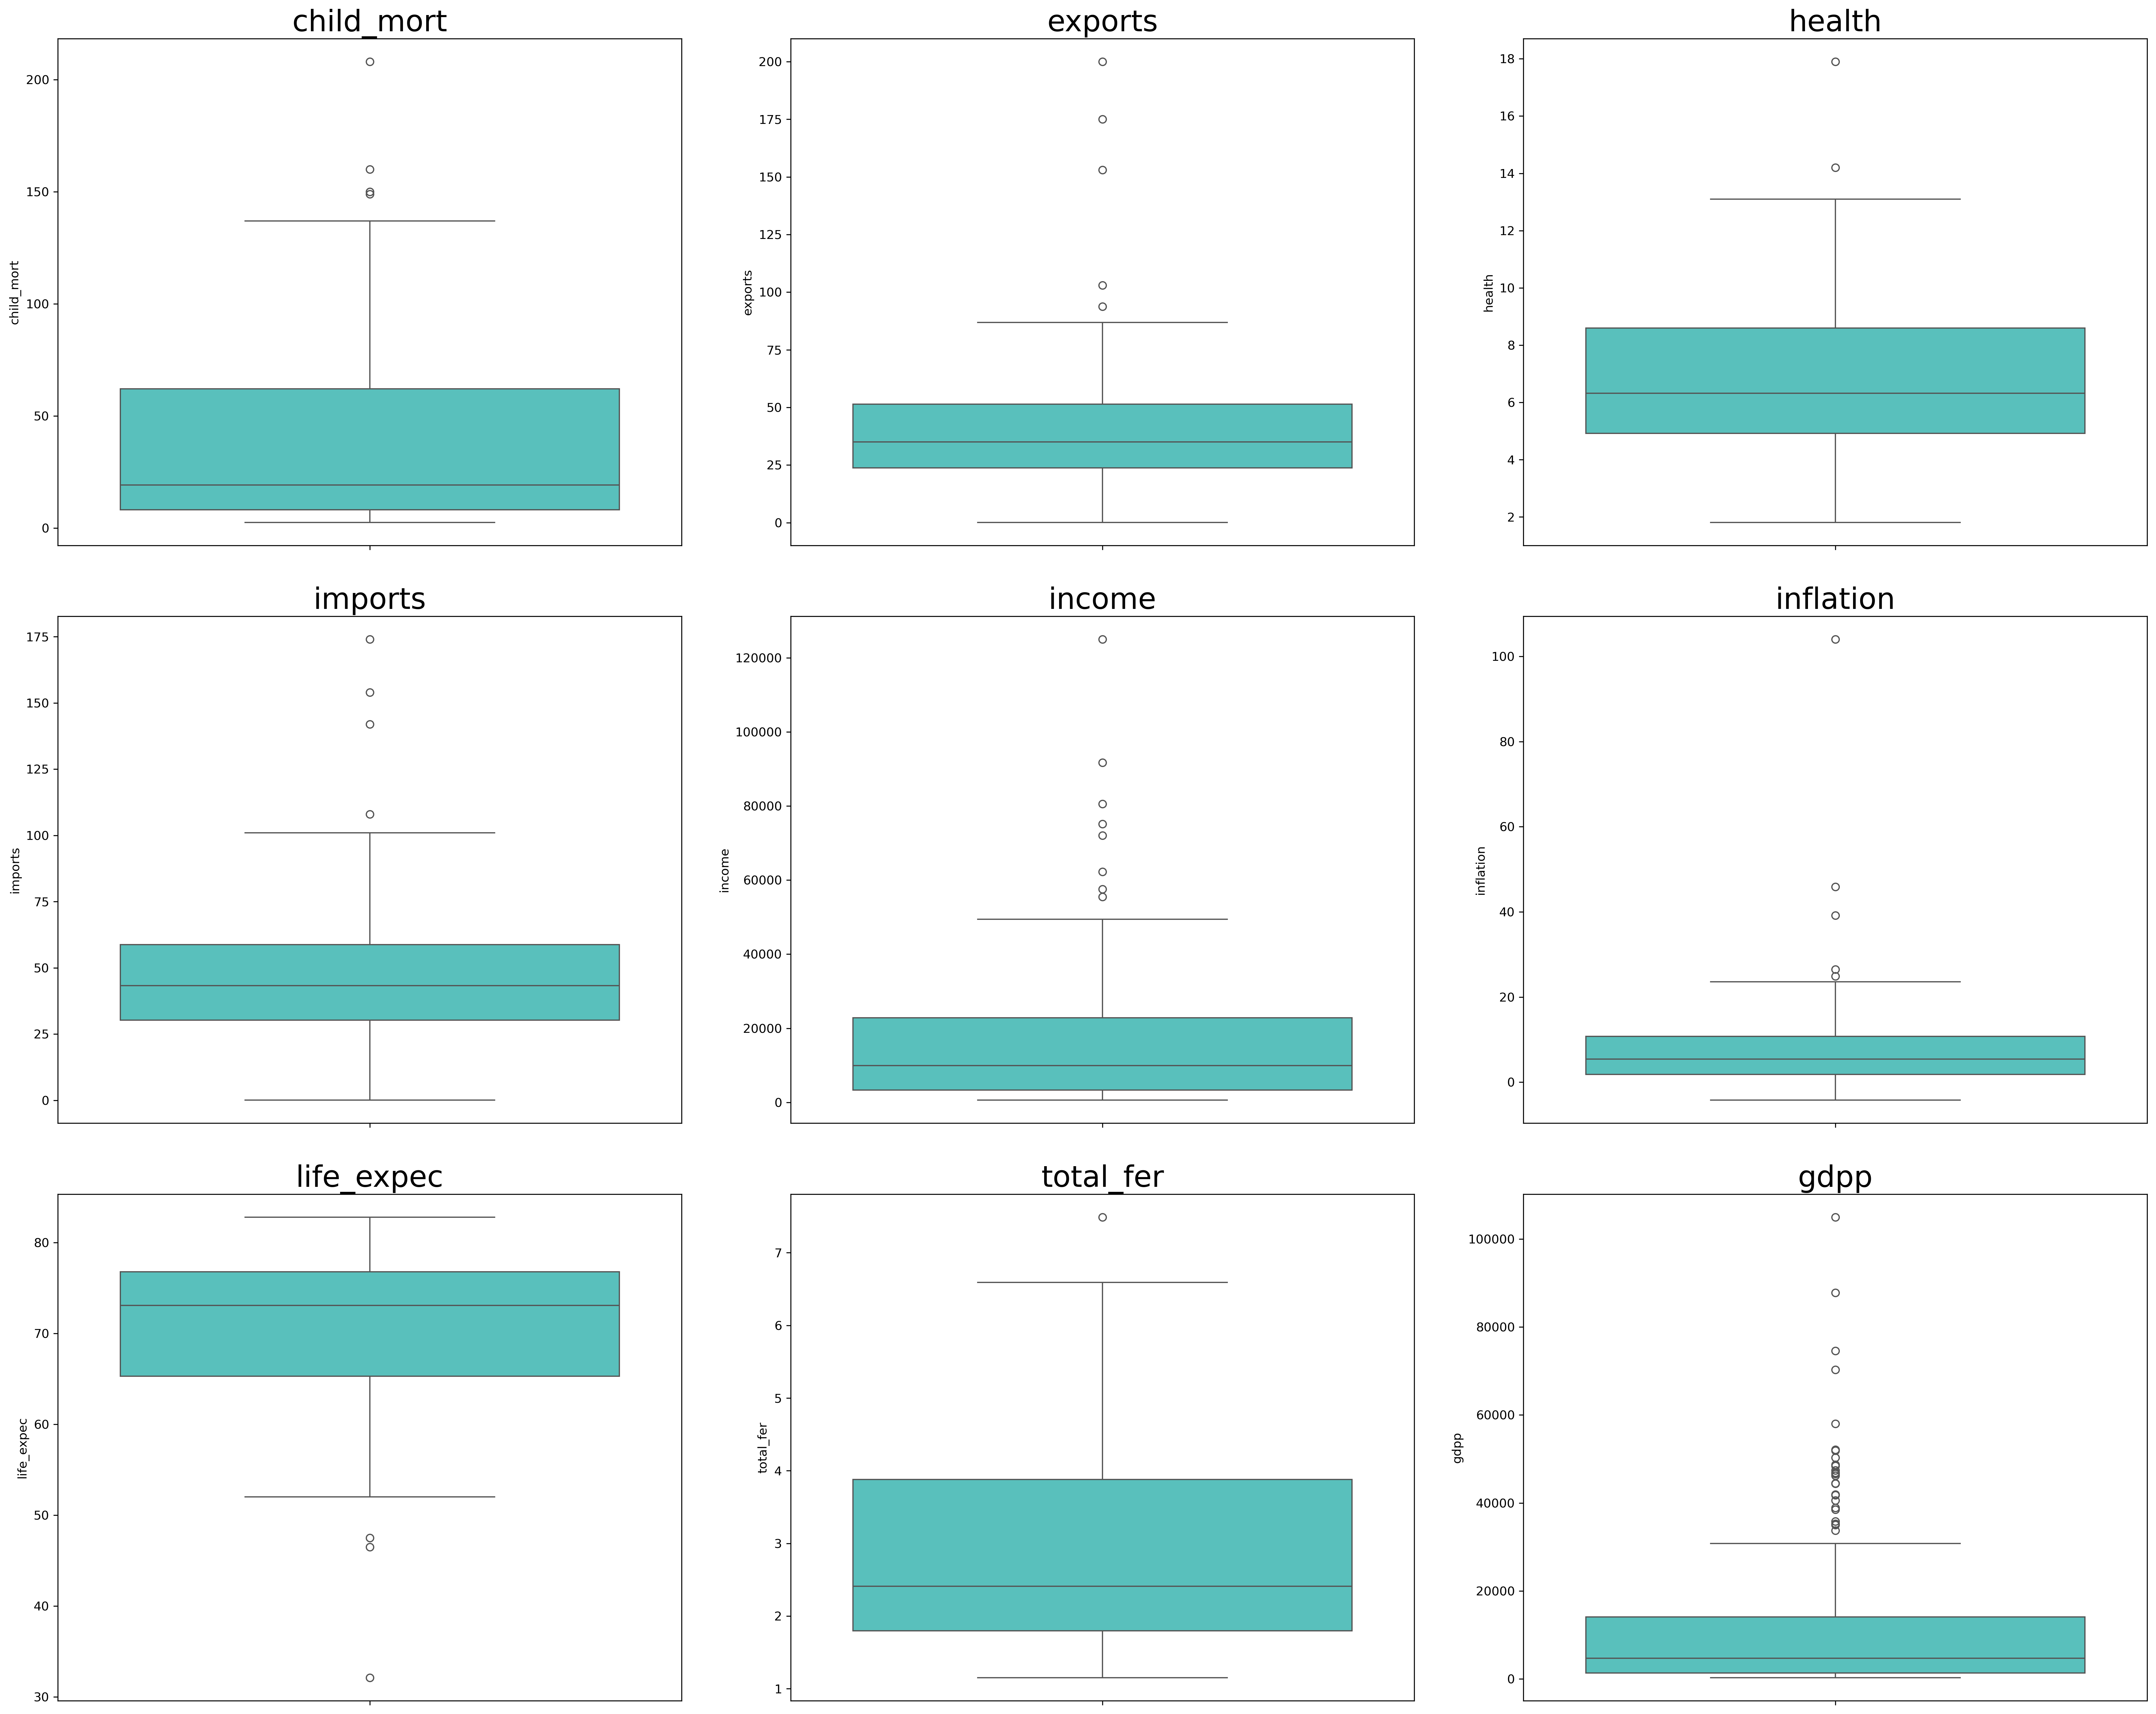

In [105]:
fig= plt.figure(figsize=(25,20), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.boxplot(y=col, data=data, color='mediumturquoise')
    plt.title(f'{col}', fontsize=24)

plt.savefig('images/02_BoxPlots.png', bbox_inches='tight')
plt.tight_layout(pad=3)
plt.show()

Although "outliers" are visible in the above boxplots, removing any countries within our problem would be a very wrong thing to do, as we cannot just "erase" countries that are extreme in some feature. Doing this goes against our goal of ranking countries by Aid Importance.

## Correlation Heatmap

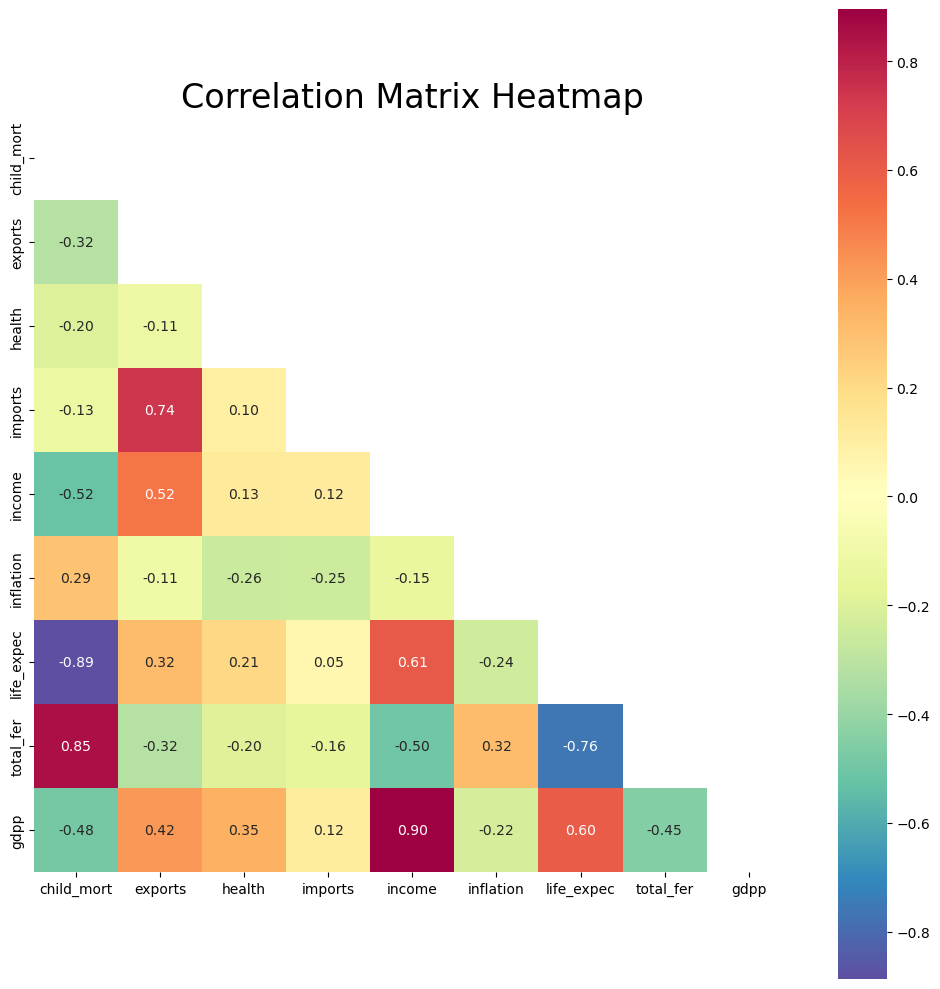

In [113]:
#Triangle Correlation Matrix in correlation heatmap form (for numerical columns)
mask = np.zeros_like(data[numerical_cols].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(10,10))
sns.heatmap(data[numerical_cols].corr(), mask= mask, square=True, annot=True, fmt='.2f', cmap ='Spectral_r', )
plt.title("Correlation Matrix Heatmap", fontsize=24)
plt.tight_layout()
plt.savefig('images/02_CorrHeatmap.png', bbox_inches='tight')
plt.show()

## Pairplots

<Figure size 2000x2000 with 0 Axes>

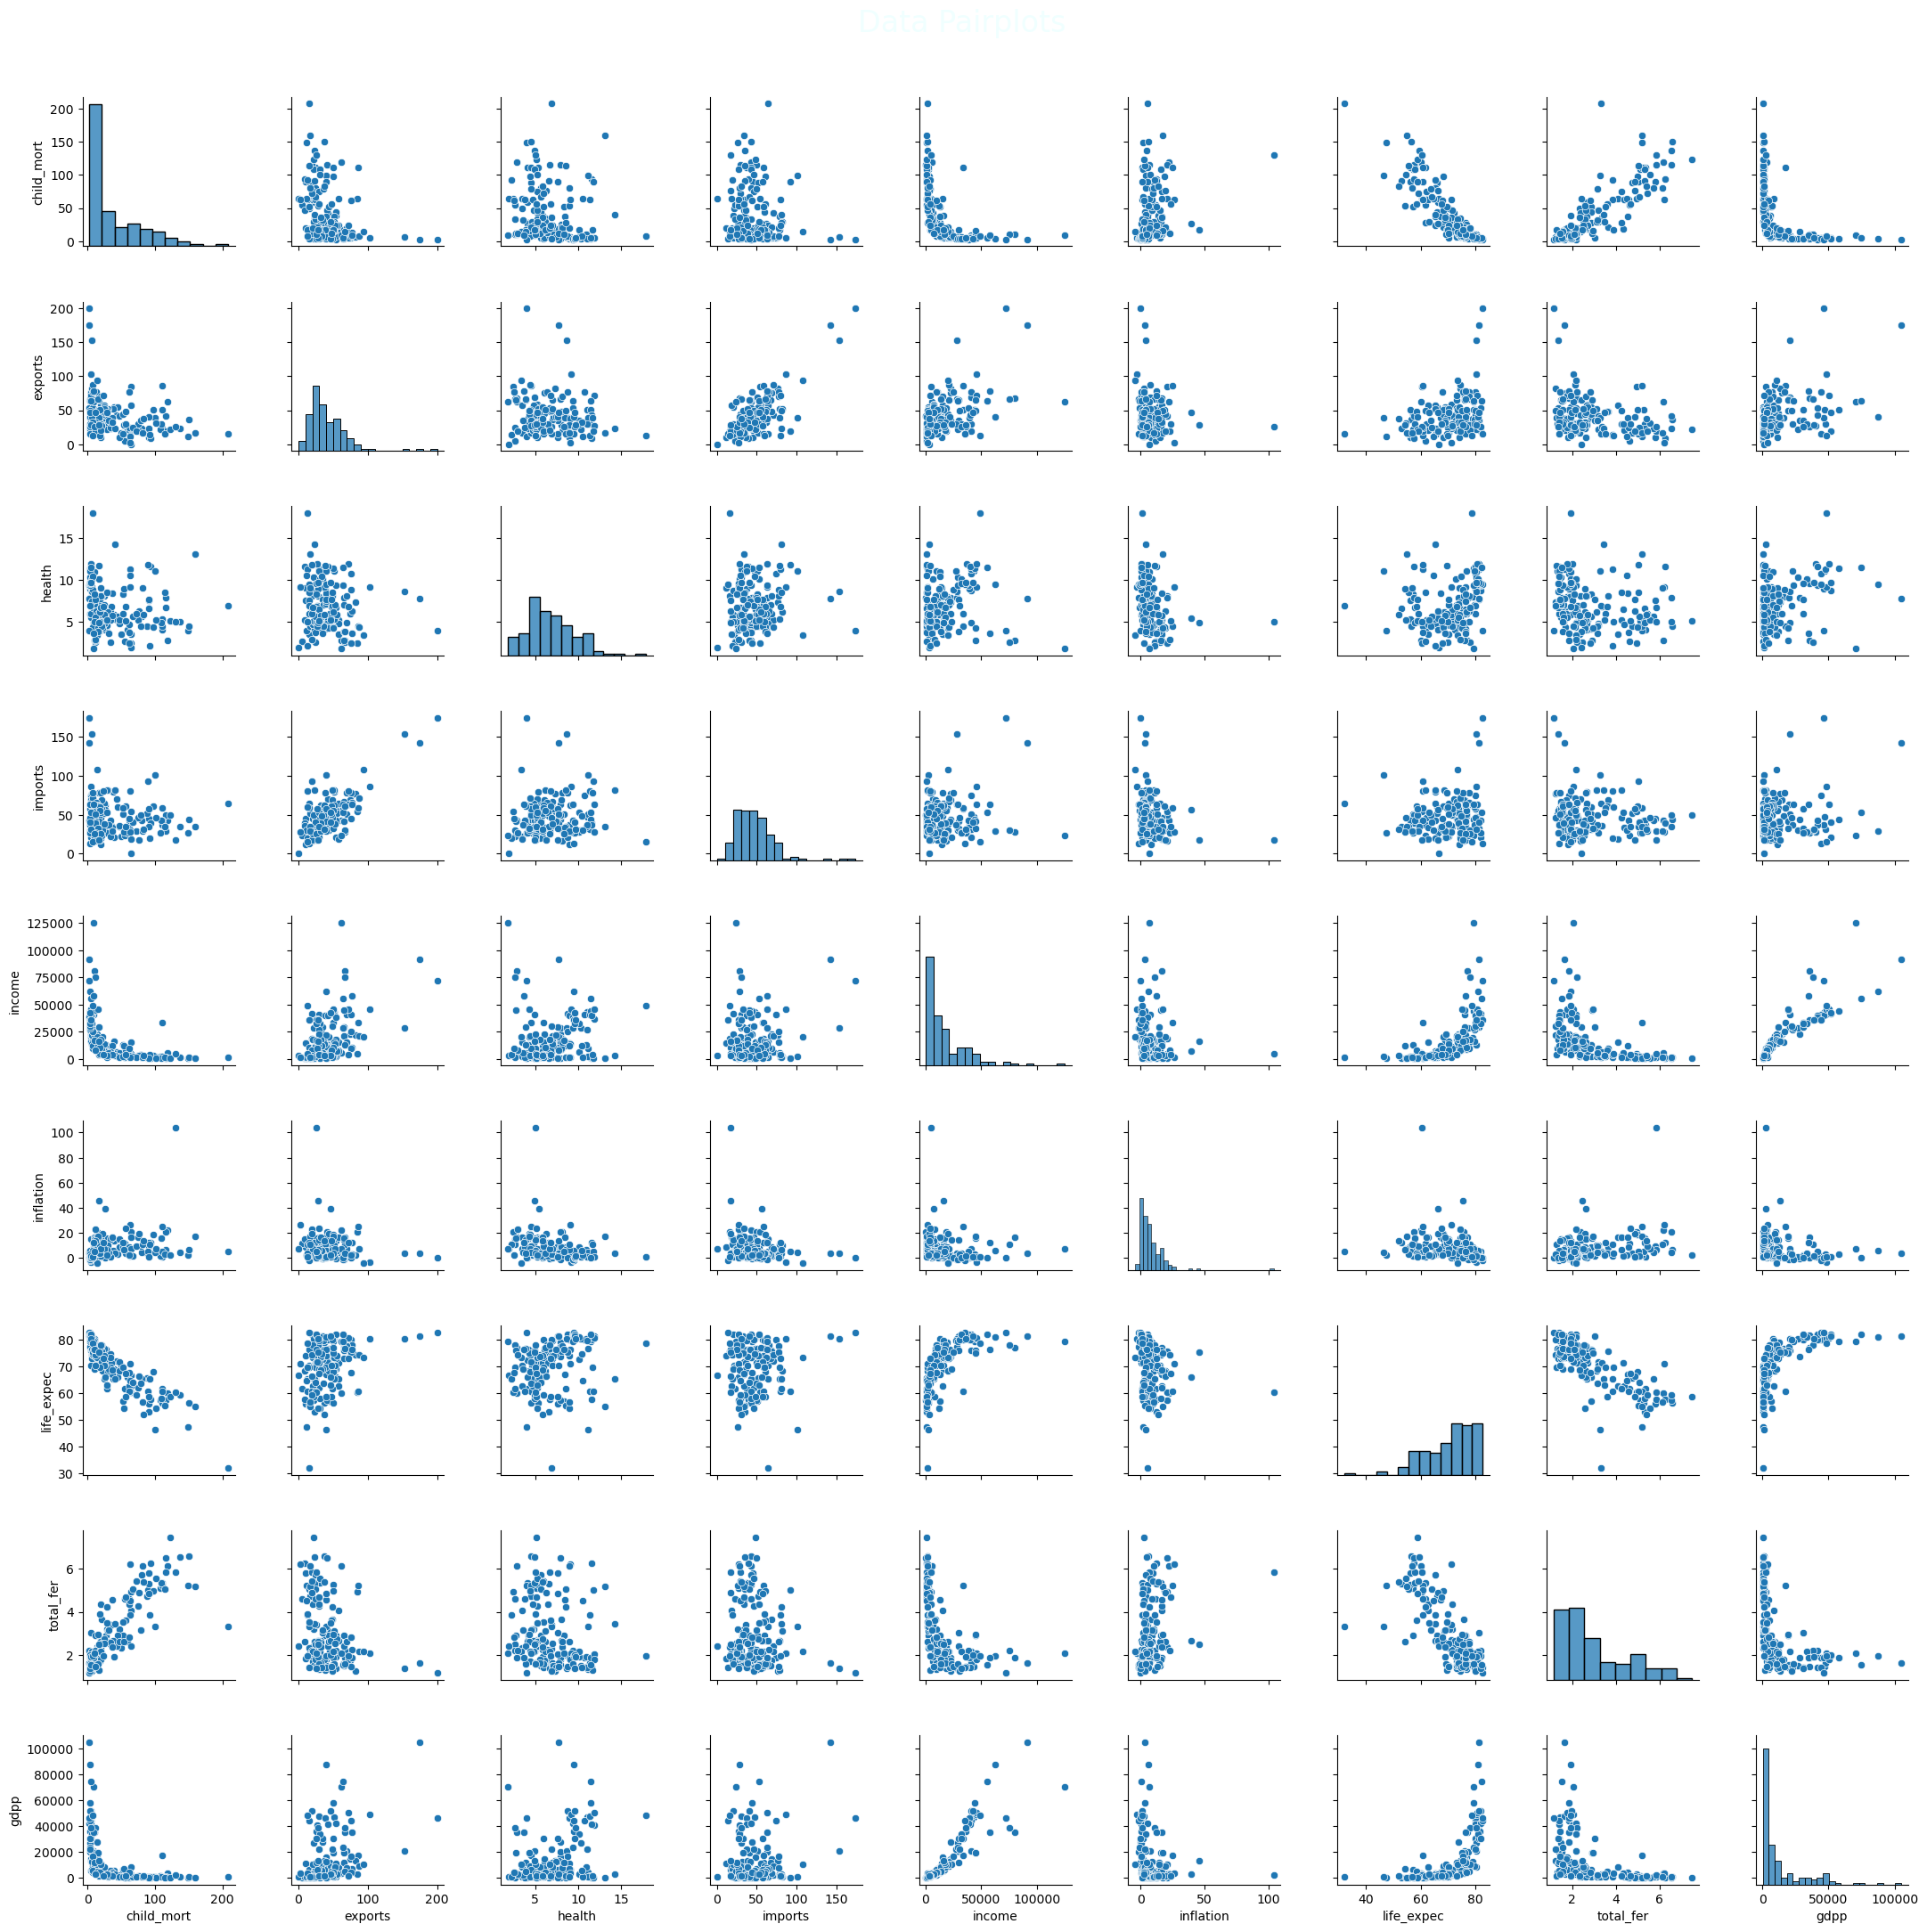

In [126]:
#Pairplots for relations between features
fig = plt.figure(figsize=(20,20))
sns.pairplot(data=data)
plt.suptitle("Data Pairplots", fontsize=24, color='azure')
plt.tight_layout(pad=4)
plt.savefig('images/02_Pairplots.png', bbox_inches='tight')
plt.show()

# 2. Machine Learning

## PCA - Principal Component Analysis

In [137]:
#Standardizing Data
scaler = StandardScaler()
data_standard = data.copy()
data_standard[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [138]:
#Dimensionality Reduction
pca = PCA()
pca.fit(data_standard[numerical_cols])

PCA()

In [141]:
#Checking how much of the variance of the original dataset is captured by individual components
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

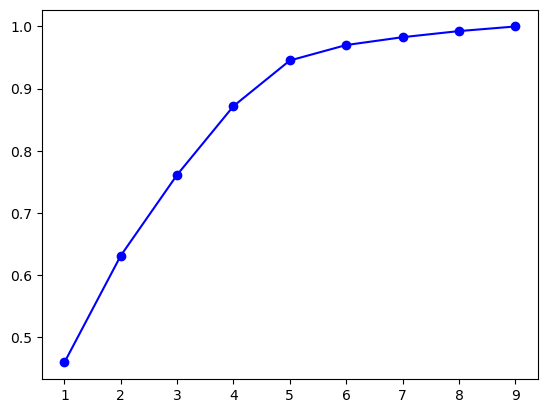

In [148]:
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-', color='blue')
plt.show()